31.03.2020
### Работа с данными
## Семинар 4. Введение в машиное обучение

Навигация:
 - [Теория](#Шпаргалка-по-линейной-регрессии)
 - [Практика](#Практика.-Цены-на-недвижимость)
 - [Задание 1](#Задание-1)
 - [Задание 2](#Задание-2)

### Шпаргалка по линейной регрессии

Обучающая выборка:
$$
D = \{(x_i, y_i) \}_{i=\overline{1,N}}
$$

Задача: восстановить функцию $h(x_i)$ в виде линейной комбинации признаков объекта (предикторов)
$$
\forall x_i: h(x_i) = w_0 + w_1x_i^1 + \ldots + + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. 
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$


Тогда эмпирический риск вычисляется по формуле:
$$
Q_{\text{emp}} = \frac{1}{2N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2 = \frac{1}{2N}\sum_{i=1}^{N}(y_i - \overline{x}_i^T\overline{w})^2 = \frac{1}{2N}||\overline{Y}-\overline{X}^T\overline{w}||^2 = \frac{1}{2N}\left(\overline{Y}-\overline{X}^T\overline{w}\right)^T\left(\overline{Y}-\overline{X}^T\overline{w}\right)
$$

Такой вид функции потерь называется RSS - *resudal squares sum*, на русский переводится как *остаточная сумма квадратов*.

Где $\hat{y_i}$ - ответ нашего алгоритма машинного обучения $h(x, \theta)$ на примере $x_i$. Чем больше значение $L$ (т.е. чем ближе оно к нулю, т.к. берём со знаком минус) тем лучше наша модель повторяет опыт $X \in m \times n$ где m - количество примеров в обучающей выборке, а $m$ - размерность пространства признаков. $w$ - это вектор параметров модели, который хотим обучить.

Мимнимум эмпирического риска можно найти аналитически, он достигается в точке
$$
\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}
$$

### Практика. Цены на недвижимость

Реализуем функцию для обучения линейной регрессии на python. Исходные данные - датасет с ценами на дома в Бостоне.

In [36]:
# загрузка данных
from sklearn.datasets import load_boston
boston_dataset = load_boston()

X = boston_dataset.data
y = boston_dataset.target

print('Фичи X')
print(features[:3])
print('\nЦелевая переменная y')
print(y[:10])

# текстовое описание датасета: print('\n',boston_dataset.DESCR)

Фичи X
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


C:\Users\79850\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


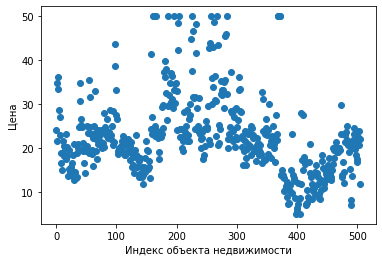

In [37]:
# визуализация y

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(features.shape[0]),
    y
)
subplot.set_xlabel('Индекс объекта недвижимости')
subplot.set_ylabel('Цена')
fig.show()

### Задание 1
Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$

In [38]:
from numpy.linalg import inv
import numpy as np

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(X.shape[1])

G = inv(np.transpose(X) @ X) @ np.transpose(X)
w_analytic = np.dot(G,y)
print(f'Аналитически определённые коэффициенты {w_analytic}')

Аналитически определённые коэффициенты [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


In [39]:
# теперь обучим модель "из коробки"
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(features, y)
print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")

Коэффициенты, вычисленные моделью sklearn [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [40]:
# сравнение результатов

from numpy.linalg import norm
print(f"\nЕвклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")


Евклидово расстояние между наборами коэффициентов 15.068939626232815



C:\Users\79850\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


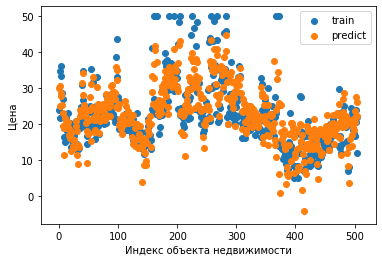

In [42]:
# визуализация решения

from matplotlib import pyplot as plt

%matplotlib inline

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(X.shape[0]),
    y, label='train'
)
plt.scatter(
    np.arange(X.shape[0]),
    reg.predict(X), label='predict'
)
subplot.legend()
subplot.set_xlabel('Индекс объекта недвижимости')
subplot.set_ylabel('Цена')
fig.show()

### Задание 2
Визуализируйте в виде "столбиков" коэффициенты "из коробки" и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

In [ ]:
# реализация

In [ ]:
y_pred = reg.predict(features)
y_true = y

In [ ]:
fig, subplot = plt.subplots()

subplot.hist(y_pred - y_true)
subplot.set_title('Распределение ошибок')
subplot.set_xlabel('Величина ошибки')
subplot.set_ylabel('Количество таких ошибок')
fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true, y_pred)

print('RMSE = %s' % rmse)

In [ ]:
from sklearn.metrics import r2_score

print("r2_score = %s" % r2_score(y_true, y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    reg.predict(features), y)
)